In [1]:
import pandas as pd
import numpy as np
import acquire as ak
import prepare

import matplotlib.pyplot as plt
import seaborn as sns

# for train val test split

#need to imoport regex into prepared file
import re

seed = 55

In [2]:
telco = ak.get_telco_churn()
telco.customer_id.nunique()

7032

## Drop columns to be included in function

In [3]:
prepare.prep_telco(telco)

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,internet_type,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,add_ons
0,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,...,Yes,Yes,No,2,Yes,2,65.60,593.30,No,4
1,Male,0,No,No,9,Yes,Yes,1,No,No,...,No,No,Yes,1,No,2,59.90,542.40,No,4
2,Male,0,No,No,4,Yes,No,2,No,No,...,No,No,No,1,Yes,1,73.90,280.85,Yes,1
3,Male,1,Yes,No,13,Yes,No,2,No,Yes,...,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes,4
4,Female,1,Yes,No,3,Yes,No,2,No,No,...,Yes,Yes,No,1,Yes,2,83.90,267.40,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Female,0,No,No,7,Yes,No,2,No,Yes,...,No,Yes,Yes,2,Yes,2,94.05,633.45,No,4
7028,Female,0,No,No,1,Yes,No,2,No,No,...,No,No,No,1,Yes,2,70.15,70.15,Yes,1
7029,Female,0,No,No,4,Yes,No,3,No internet service,No internet service,...,No internet service,No internet service,No internet service,1,No,3,20.95,85.50,Yes,1
7030,Male,0,No,No,2,Yes,No,1,No,Yes,...,No,No,No,1,Yes,2,50.30,92.75,No,2


## Add to prepare along with regex import

In [4]:
# drops all duplicate columns
'''
for i in telco.columns:
    if re.search(r'\d$',i):
        telco.drop(i, axis = 1, inplace = True)
        
        '''

"\nfor i in telco.columns:\n    if re.search(r'\\d$',i):\n        telco.drop(i, axis = 1, inplace = True)\n        \n        "

In [5]:
# drops redundant columns in favor of their numerical or boolean counterparts. 
# drop churn month becuse all values are the same.
# telco.drop(columns = ['payment_type', 'customer_id', 'contract_type', 'internet_service_type', 'churn_month', 'signup_date'], inplace = True)

In [6]:
# compare like columns
# telco[['tenure', 'signup_date']]

In [7]:
# sorted(telco.columns)

In [8]:
# telco.isna().sum()

In [9]:
# telco.head()

In [10]:
# renames columns
'''telco.rename(columns = {'senior_citizen': 'senior', 'internet_service_type_id' :'internet_type', 
                     'contract_type_id': 'contract_type'} , inplace = True)'''

"telco.rename(columns = {'senior_citizen': 'senior', 'internet_service_type_id' :'internet_type', \n                     'contract_type_id': 'contract_type'} , inplace = True)"

In [11]:
# loop used to peak at unique values
'''
for i in telco.columns:
    print("Column:", i)
    print(telco[i].value_counts())
    print("-----------------------------")
'''
  

'\nfor i in telco.columns:\n    print("Column:", i)\n    print(telco[i].value_counts())\n    print("-----------------------------")\n'

In [12]:
# trying to find blank spaces
# mask_all = (telco.applymap(lambda x: str(x).strip() == '')).any(axis=1)

# Display rows where any column is blank or spaces
# print(telco[mask_all])

In [13]:
train, val, split = prepare.train_val_test(telco,'churn')

## make a new feature called add ons that tally all add ons

In [14]:
train.head(1)

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,internet_type,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,add_ons
6235,Male,0,No,Yes,39,Yes,Yes,2,No,No,...,Yes,Yes,Yes,3,No,2,100.55,3895.35,No,6


In [15]:
# telco['add_ons'] = (telco.phone_service == 'Yes').astype(int) + (telco.multiple_lines == 'Yes').astype(int) + (telco.online_security == 'Yes').astype(int) + (telco.multiple_lines == 'Yes').astype(int) + (telco.online_backup == 'Yes').astype(int) + (telco.tech_support == 'Yes').astype(int) + (telco.streaming_tv == 'Yes').astype(int) + (telco.streaming_movies == 'Yes').astype(int)

In [16]:
telco.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,internet_type,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,add_ons
0,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,...,Yes,Yes,No,2,Yes,2,65.6,593.30,No,4
1,Male,0,No,No,9,Yes,Yes,1,No,No,...,No,No,Yes,1,No,2,59.9,542.40,No,4
2,Male,0,No,No,4,Yes,No,2,No,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,1
3,Male,1,Yes,No,13,Yes,No,2,No,Yes,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,4
4,Female,1,Yes,No,3,Yes,No,2,No,No,...,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes,3


These are the add ones that need tallying. 

phone_service, multiple_lines, online_security, online_backup, tech_support, streaming_tv, streaming_movies

In [17]:
# compare like columns
# telco[['phone_service', 'multiple_lines']]

In [18]:
telco.streaming_movies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [19]:
''''''
phone_service , multiple_lines, 
def add_ons(train):
    train[phone]

SyntaxError: invalid syntax (1116488386.py, line 1)

Visualize our data

In [ ]:
sns.countplot(x=train.churn)


Questions:
What effect does tenure have on churn?
What effect does total charges have on churn?
How do differnt add-ons effect churn?
Is costomer demographic a predictor of churn?

tenure vs churn

In [ ]:
# fix up the pie chart but the chart shows that 26% of cusomers churn each month
# that is the cost cutting that we are targetting

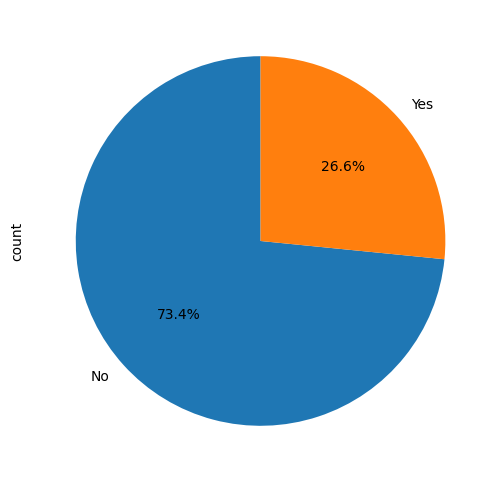

In [20]:
counts = train.churn.value_counts()

plt.figure(figsize=(8, 6))
counts.plot.pie(autopct='%1.1f%%', startangle=90 )
plt.show()

In [ ]:
sns.countplot(x=train.churn, hue =train.senior)

In [27]:

def churn_line_plot(dataframe):
    plt.figure(figsize=(12, 6))

    # Group data by tenure and churn status, then compute the mean of total_charges
    avg_charges = dataframe.groupby(['tenure', 'churn'])['total_charges'].mean().reset_index()

    # Plot line chart
    sns.lineplot(x='tenure', y='total_charges', hue='churn', data=avg_charges)
    
    # Title & Labels
    plt.title('Average Total Charges Over Tenure by Churn Status')
    plt.xlabel('Tenure (Months)')
    plt.ylabel('Average Total Charges')
    plt.legend(title='Churn Status')
    
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()


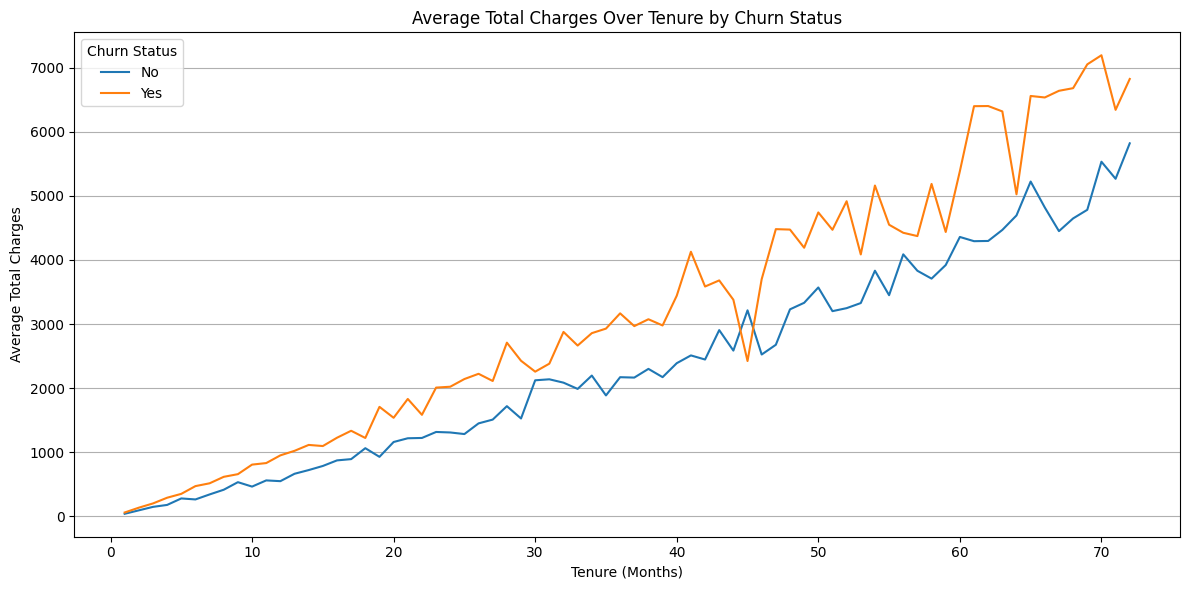

In [28]:
churn_line_plot(train)

### Statistical tests
#### next I am looking at correlation between some features and thier impact on churn
- if features are tightly coorelated will add them to the same feature or delete them
-- or recommend to also pitch similar services to them
-- need to run a statistical test on each service and one on all togehter. Perhaps this is best done first with a logistic regression


$H_0$ tenure has NO effect on churn.

$H_a$ tenure has an effect on churn.

Mann-Whitney  test.

$H_0$ total_charges has NO effect on churn.

$H_a$ total_charges has an effect on churn.

Mann-Whitney test.

$H_0$ monthly_charges has NO effect on churn.

$H_a$ monthly_charges has an effect on churn.

Mann-Whitney test.

$H_0$ age has NO effect on churn.

$H_a$ age has an effect on churn.

Mann-Whitney test.

$H_0$ gender has NO effect on churn.

$H_a$ gender has an effect on churn.

chi^2 test.

$H_0$ gender and age have NO effect on churn.

$H_a$ gender and age have an effect on churn.

multivariate logistic regression.

$H_0$ add_ons have NO effect on churn.

$H_a$ add_ons have an effect on churn.

Mann-Whitney test.

In [ ]:
sorted(train.columns)

In [ ]:
# Function to test if differnt add ons correlate to eachother correlate to eachother
def mann_whitney_test(feature1, feature2):
    stat, p_value = mannwhitneyu(feature1, feature2)

In [ ]:
x_train = train.drop(columns=['churn'])
y_train = train[target_col]
x_val = val.drop(columns=['churn'])
y_val = val['churn']
x_test = test.drop(columns=['churn'])
y_test = test['churn']


In [29]:
train.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,internet_type,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,add_ons
6235,Male,0,No,Yes,39,Yes,Yes,2,No,No,...,Yes,Yes,Yes,3,No,2,100.55,3895.35,No,6
860,Male,0,Yes,Yes,52,Yes,Yes,3,No internet service,No internet service,...,No internet service,No internet service,No internet service,3,No,2,24.80,1229.10,No,3
4615,Male,0,Yes,Yes,58,No,No phone service,1,Yes,Yes,...,No,Yes,No,2,No,2,50.00,2919.85,No,3
4139,Male,1,No,No,21,Yes,No,1,No,No,...,No,Yes,No,1,Yes,3,60.05,1236.15,Yes,2
5057,Female,0,Yes,Yes,48,Yes,No,1,Yes,No,...,Yes,Yes,No,2,No,3,69.70,3023.65,No,4


In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train, y_train)
y_val_pred = knn_clf.predict(x_val)
model.theometrics2(y_val, y_val_pred)